In [2]:
# William Gunawan, Kenji Nakachi, Andrew Fortner, Kate Zhang

<h1> Overview </h1>

We chose the Airline Passenger Satisfaction Dataset from Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).\
The features are described in the next section *Column Context*.\
Our goal is to predict "Customer Satisfcation" given all of the other features. 

<h2>Column Context:</h2>

*Gender:* Gender of the passengers **(Female, Male)**

*Customer Type:* The customer type **(Loyal customer, disloyal customer)**

*Age:* The actual age of the passengers **(years)**

*Type of Travel:* Purpose of the flight of the passengers **(Personal Travel, Business Travel)**

*Class:* Travel class in the plane of the passengers **(Business, Eco, Eco Plus)**

*Flight distance:* The flight distance of this journey **(miles)**

*Inflight wifi service:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure/Arrival time convenient:* Satisfaction level **(0:Not Applicable;1-5)**

*Ease of Online booking:* Satisfaction level **(0:Not Applicable;1-5)**

*Gate location:* Satisfaction level **(0:Not Applicable;1-5)**

*Food and drink:* Satisfaction level **(0:Not Applicable;1-5)**

*Online boarding:* Satisfaction level **(0:Not Applicable;1-5)**

*Seat comfort:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight entertainment:* Satisfaction level **(0:Not Applicable;1-5)**

*On-board service:* Satisfaction level **(0:Not Applicable;1-5)**

*Leg room service:* Satisfaction level **(0:Not Applicable;1-5)**

*Baggage handling:* Satisfaction level **(0:Not Applicable;1-5)**

*Check-in service:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight service:* Satisfaction level **(0:Not Applicable;1-5)**

*Cleanliness:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure Delay in Minutes:* Minutes delayed when departure **(Minutes)**

*Arrival Delay in Minutes:* Minutes delayed when Arrival **(Minutes)**

*Satisfaction:* Airline satisfaction level **(Satisfaction, neutral or dissatisfaction)**

In [3]:
# Import packages
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [4]:
# Download data
data = pd.read_csv("https://raw.githubusercontent.com/katezhang1234/ML_Airline_Project/main/train.csv")
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h1> Step 1: Data Cleaning </h1>
<h3> 1.1: Remove Unnecessary Columns </h3>

We don't want to use features like *ID* in our classification, so we drop these unnecessary features

In [5]:
# Check for duplicated rows
print("Duplicated IDs: ",data['id'].duplicated().sum())

# Drop id and Unnamed columns -- we do not want to use these as features
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(5)

Duplicated IDs:  0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h3> 1.2: Encoding Categorical Values </h3>

In order to impute missing values, we need to encode our categorical values into numerical values

In [6]:
#One hot encoding of categorical variables
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

df_encoded = pd.get_dummies(data, columns=categorical_variables)
df_encoded.drop(['Gender_Female', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied'], axis=1, inplace=True)

labels = df_encoded['satisfaction_satisfied']
df_encoded.drop(['satisfaction_satisfied'], axis=1, inplace=True)
# Print the first five rows of the encoded DataFrame
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,1,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,6.0,1,0,0,1
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,0,1,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,1,0,1
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,1,0,1


In [7]:
# Check for 0s / nulls / missing values
nan_count = df_encoded.isna().sum().sum()
print("Training Set Missing values = ", nan_count)
df_encoded[df_encoded.isna().any(axis=1)]

Training Set Missing values =  310


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
213,38,109,5,3,3,3,5,5,5,5,...,4,1,1,5,31,NaN,0,1,0,0
1124,53,1012,3,2,3,4,4,3,4,4,...,4,3,3,4,38,NaN,1,1,1,0
1529,39,733,2,5,5,5,2,4,3,2,...,2,2,2,3,11,NaN,1,1,0,1
2004,26,1035,3,3,3,1,2,3,2,2,...,4,5,5,2,41,NaN,0,0,0,1
2108,24,417,2,1,2,2,5,2,5,5,...,2,1,2,5,1,NaN,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,49,1249,2,5,2,3,2,3,3,3,...,4,3,4,3,230,NaN,1,1,1,0
102384,58,733,3,3,3,3,3,3,3,3,...,2,4,2,3,55,NaN,1,1,0,0
102552,29,1107,2,1,1,1,5,1,3,5,...,5,5,3,5,0,NaN,0,0,0,0
102960,58,1088,4,4,1,1,5,4,5,5,...,5,5,3,5,0,NaN,1,1,0,0


<h3>1.3 Split Into Test & Train Sets & Impute Missing Data</h3>

In [8]:
from sklearn.model_selection import train_test_split
# split data

X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.2, random_state=42)

# Impute Arrival Delay in Minutes column with mean
# We're only doing this column since this is the only column with NaN values (seen from above)
mean_value_train = X_train['Arrival Delay in Minutes'].mean()
X_train['Arrival Delay in Minutes'].fillna(value=mean_value_train, inplace=True)
nan_count_train = X_train.isna().sum().sum()
print("Training Set Missing values = ", nan_count_train)

mean_value_test = X_test['Arrival Delay in Minutes'].mean()
X_test['Arrival Delay in Minutes'].fillna(value=mean_value_test, inplace=True)
nan_count_test = X_test.isna().sum().sum()
print("Test Set Missing values = ", nan_count_test)

Training Set Missing values =  0
Test Set Missing values =  0


<h2>Step 2: Data Exploration</h2>

In [18]:
import seaborn as sns
# Data Exploration
combined_train_df = X_train.join(y_train)
combined_train_df.corr()['satisfaction_satisfied']

Age                                  0.136607
Flight Distance                      0.299090
Inflight wifi service                0.282104
Departure/Arrival time convenient   -0.050427
Ease of Online booking               0.170423
Gate location                        0.000248
Food and drink                       0.209592
Online boarding                      0.503269
Seat comfort                         0.349035
Inflight entertainment               0.396520
On-board service                     0.322308
Leg room service                     0.311918
Baggage handling                     0.246778
Checkin service                      0.235985
Inflight service                     0.243859
Cleanliness                          0.303724
Departure Delay in Minutes          -0.051657
Arrival Delay in Minutes            -0.058794
Gender_Male                          0.012337
Customer Type_Loyal Customer         0.186588
Type of Travel_Personal Travel      -0.449025
Class_Business                    

<AxesSubplot:xlabel='Class_Business', ylabel='satisfaction_satisfied'>

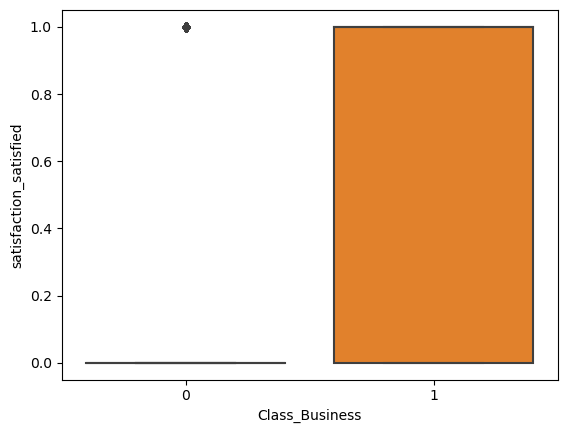

In [33]:
# Univariate: boxplot, histogram
sns.boxplot(x="Class_Business", y="satisfaction_satisfied", data=combined_train_df)
# Bivariate: scatter plot, correlation coefficient
# Check for class imbalance
# Look for outliers/noise

<AxesSubplot:xlabel='satisfaction_satisfied', ylabel='Seat comfort'>

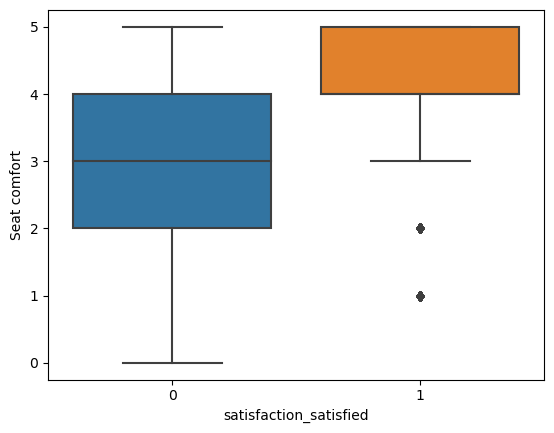

In [34]:
sns.boxplot(x="satisfaction_satisfied", y="Seat comfort", data=combined_train_df)

<AxesSubplot:xlabel='satisfaction_satisfied', ylabel='Inflight entertainment'>

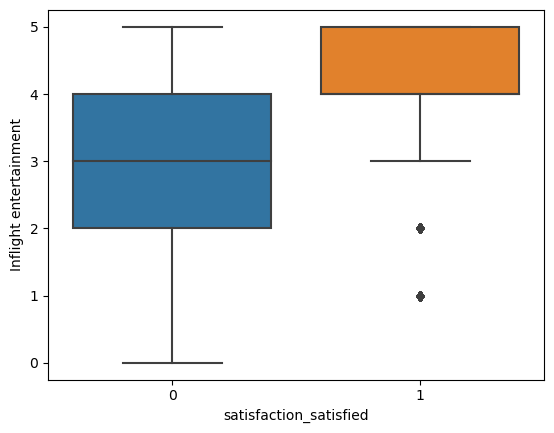

In [37]:
sns.boxplot(x="satisfaction_satisfied", y="Inflight entertainment", data=combined_train_df)

In [10]:
# Feature Engineering
# Feature transformation, selection, creation
#       Selection: sampling to reduce dataset size?
#       Creation: aggregation
# Feature scaling: normalization/standardization
# Deal with outliers - histogram
#       Delete, impute, binning
# Dimensionality reduction
# One-hot encoding categorical variables? This may be dependent on the ML techniques used

In [11]:
# Clustering ... this might also count as data exploration
# Look for natural patterns in the data
# Optional, if we have time

# K-means
# DBScan
# Hierarchical clustering

# Anomaly detection

In [12]:
# Modeling - Regression
# Pick certain continu

In [13]:
# Modeling - Decision Tree

In [14]:
# Modeling - KNN

In [15]:
# Evaluation